<a href="https://colab.research.google.com/github/achmadrachmandika/PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama: Achmad Rachmandika Rizky Pratama
##Kelas: 3A
##NIM: 2041720125
Dilasi, Erosi, Operasi Opening, Operasi Closing, Top Hat, Black Hat

D. TUGAS PRAKTIKUM
1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [89]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

In [132]:
def dilasi_citra(F, w):
  height, width = F.shape

  image1_copy = np.zeros((height, width), dtype=np.uint8)

  # generate structure element
  structure_element = np.ones((w,w), dtype=np.uint8)
  constant = (w - 1) // 2

  # melakukan proses dilasi
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structure_element
      image1_copy[i,j]= np.max(product)

  return image1_copy


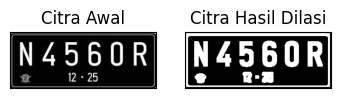

In [134]:

  image1 = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

w = 5
ret, thresh = cv2.threshold(image1 , 125, 200, cv2.THRESH_BINARY)
image1_copy = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(image1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image1_copy, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

[[1 1 1]
 [1 1 1]
 [1 1 1]]


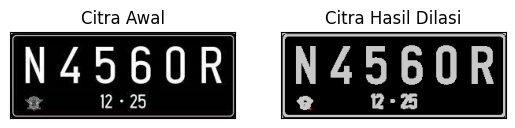

In [135]:
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg')

ret, thresh = cv2.threshold(image , 125, 200, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(dilasi), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


In [139]:
def erosi_citra(F, k):
  height, width = F.shape

  structural_erosi = np.ones((k,k), dtype=np.uint8)
  constant = (k - 1) // 2

  image_copy = np.zeros((height, width), dtype=np.uint8)
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structural_erosi
      image_copy[i,j] = np.min(product)

  return image_copy


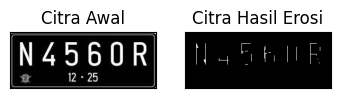

In [140]:
image1 = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

k = 5
ret, thresh = cv2.threshold(image1, 175, 225, cv2.THRESH_BINARY)
image_copy = erosi_citra(thresh, k)

plt.subplot(131), plt.imshow(image1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:


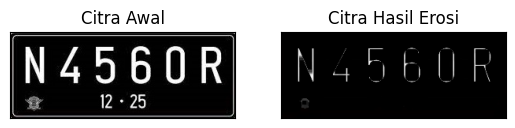

In [141]:
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg')
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(image, kernel,iterations = 1)

plt.subplot(121),plt.imshow(image),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology


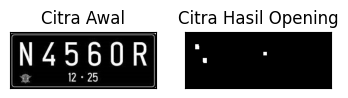

In [142]:
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

k = 7
reto, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
image_result = dilasi_citra(erosi_citra(thresh,k),k)

plt.subplot(131), plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_result, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

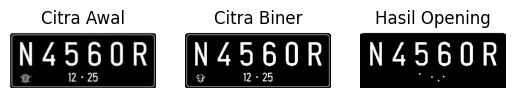

In [143]:
# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

# Mengubah citra menjadi citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat kernel berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi opening
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Menampilkan citra input, citra biner, dan hasil opening
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Hasil Opening')
plt.axis('off')

plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology


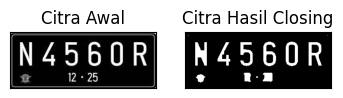

In [144]:
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

k = 7
retc, threshc = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
image_copy = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

operasi closing dengan library morphology


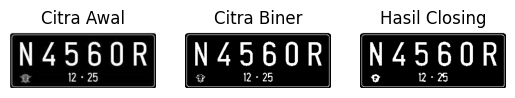

In [101]:
# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

# Mengubah citra menjadi citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat kernel berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi closing
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Menampilkan citra input, citra biner, dan hasil closing
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Hasil Closing')
plt.axis('off')

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:


(-0.5, 286.5, 109.5, -0.5)

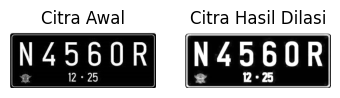

In [102]:
# Reading the input image
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

# Taking a matrix of size 5 as the kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# The first parameter is the original image,
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_dilation, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

(-0.5, 286.5, 109.5, -0.5)

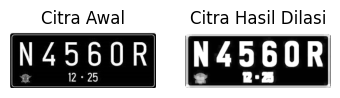

In [58]:
# Reading the input image
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

# Taking a matrix of size 5 as the kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# The first parameter is the original image,
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_dilation, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

(-0.5, 286.5, 109.5, -0.5)

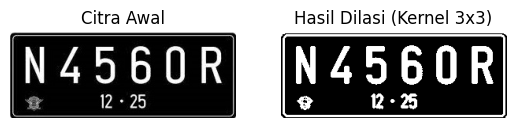

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dilate(image, kernel):
    # Melakukan operasi dilasi
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    return dilated_image

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

# Mengubah citra menjadi citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat kernel berbentuk circular 3x3
kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Melakukan dilasi dengan kernel circular 3x3
dilated_image_3x3 = dilate(binary_image, kernel_3x3)

# Membuat kernel berbentuk circular 5x5
kernel_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Melakukan dilasi dengan kernel circular 5x5
dilated_image_5x5 = dilate(binary_image, kernel_5x5)

# Menampilkan citra input, dan hasil dilasi dengan kernel 3x3 dan 5x5
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Hasil Dilasi (Kernel 3x3)')
plt.axis('off')


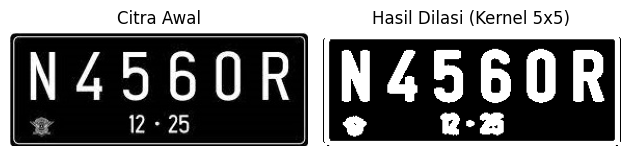

In [66]:
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Hasil Dilasi (Kernel 5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:


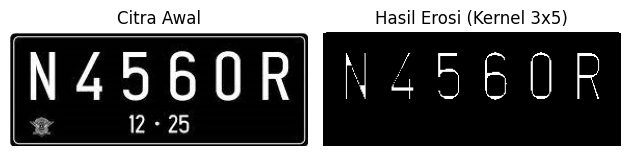

In [145]:
def erode(image, kernel):
    # Melakukan operasi erosi
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

# Mengubah citra menjadi citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat kernel berbentuk rectangle 3x5
kernel_3x5 = np.ones((3, 5), dtype=np.uint8)

# Melakukan erosi dengan kernel rectangle 3x5
eroded_image_3x5 = erode(binary_image, kernel_3x5)

# Membuat kernel berbentuk rectangle 5x7
kernel_5x7 = np.ones((5, 7), dtype=np.uint8)

# Melakukan erosi dengan kernel rectangle 5x7
eroded_image_5x7 = erode(binary_image, kernel_5x7)

# Menampilkan citra input, citra biner, dan hasil erosi dengan kernel 3x5 dan 5x7
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title('Hasil Erosi (Kernel 3x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [147]:
def erosi_citra(F,p,l):

  m,n= F.shape
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l))
  constant1= (l-1)//2
  constant2= (p-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j] = np.min(product)

  return imgE

SE = Rectangle 5 x 7


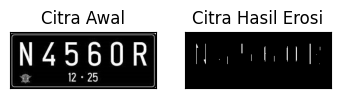

In [148]:
print('SE = Rectangle 5 x 7')
img_e = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

l, p = 7, 5
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

In [149]:
def erosi_citra(F,k):
  m,n= F.shape

  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k))
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j- constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

SE = Line Vertikal 3


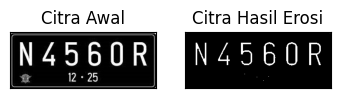

In [150]:
print('SE = Line Vertikal 3')

k = 3
img_e= cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 5


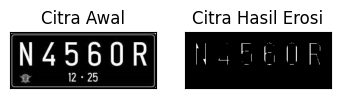

In [152]:
print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/plat nomer.jpg', 0)

k = 5
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

13. TOP HAT

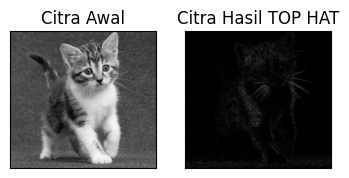

In [153]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()


14. Black Hat

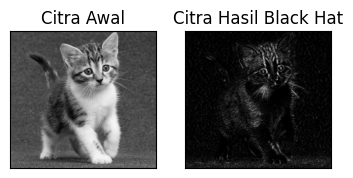

In [154]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)


plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

15. Skeleton

In [206]:
from skimage import filters
from skimage.morphology import skeletonize
from skimage import io, color, morphology

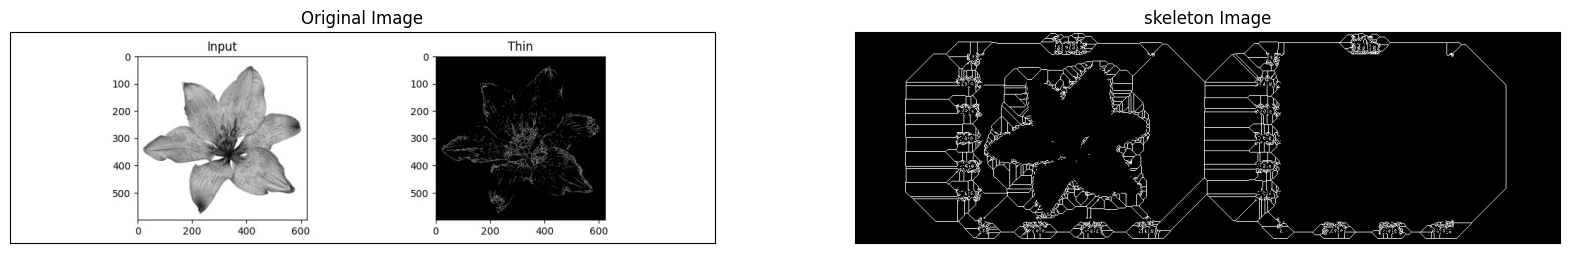

In [209]:
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/lily.jpg', 0)
binary = img > filters.threshold_triangle(img)
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images plt.figure(figsize=(20,20))

plt.figure(figsize=(20, 6))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

Skleton Inverse

In [211]:
from skimage import io, color, morphology

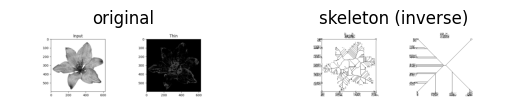

In [213]:
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/lily.jpg', 0)
binary = img < filters.threshold_triangle(img)
skeleton = skeletonize(binary)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

17. Thinckening

In [214]:
from skimage import io, color, morphology
from skimage import img_as_float

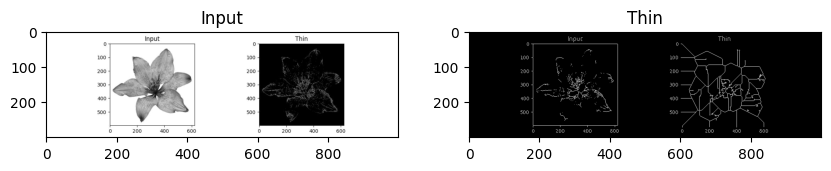

In [216]:
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/lily.jpg', 0)
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

# plt.savefig('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week9/images/lily.jpg')
plt.show()

SOAL PRAKTIKUM

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.


DILASI

In [174]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [166]:
def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

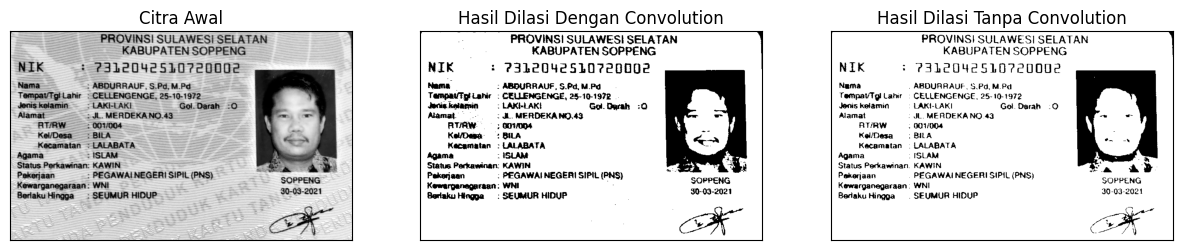

In [173]:
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week3/KTP.jpeg')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

# cv2_imshow
result = conv2d(img, kernel_lsed,1)
brightness = Brightness(result, -35)

input = cv2.cvtColor(brightness, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)


input2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY)
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Hasil Dilasi Dengan Convolution')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Hasil Dilasi Tanpa Convolution')
plt.xticks([]), plt.yticks([])
plt.show()

CLOSING

In [175]:
def convert_to_binary(image):
    # Konversi gambar ke dalam citra grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan fungsi thresholding dengan flag THRESH_OTSU
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

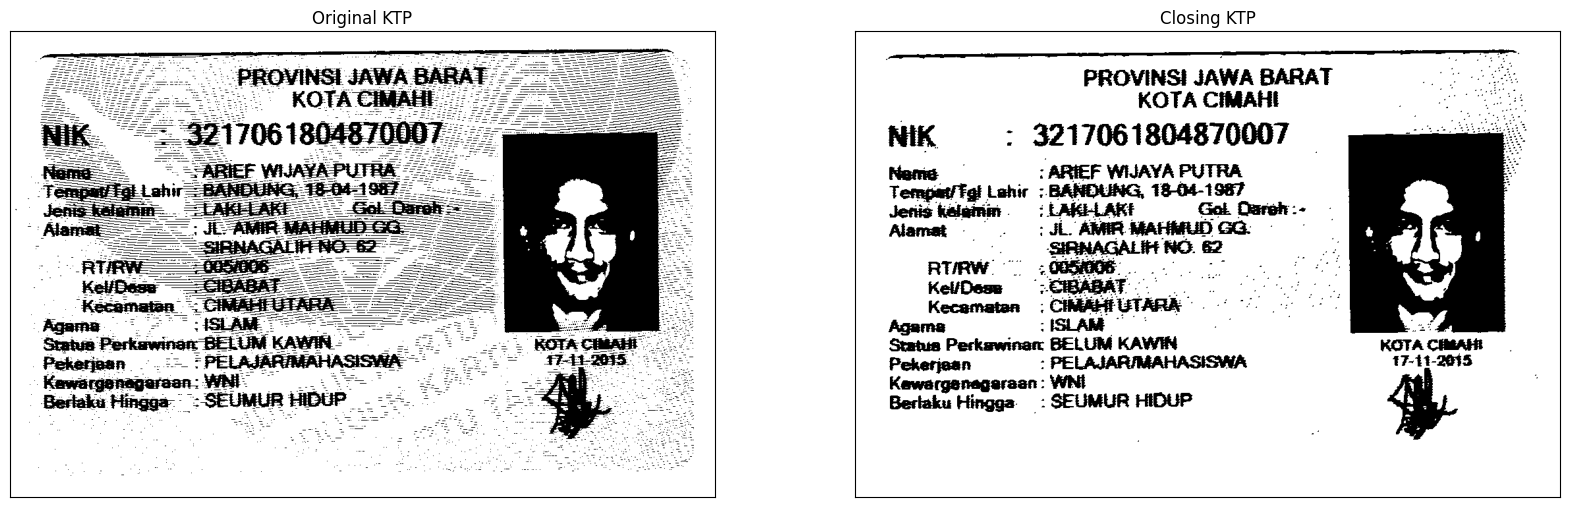

In [181]:
# Membaca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp2.png')

# Ubah ke binary
ktp_image = convert_to_binary(ktp_image)

# Closing
kernel = np.array([[1, 1],
                              [1, 0]], dtype = np.uint8)
closs = cv2.morphologyEx(ktp_image,cv2.MORPH_CLOSE, kernel)

# Menampilkan citra KTP
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(X=ktp_image, cmap = 'gray')
plt.title('Original KTP'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(X=closs,cmap = 'gray')
plt.title('Closing KTP'), plt.xticks([]), plt.yticks([])


plt.show()

BLACK HAT

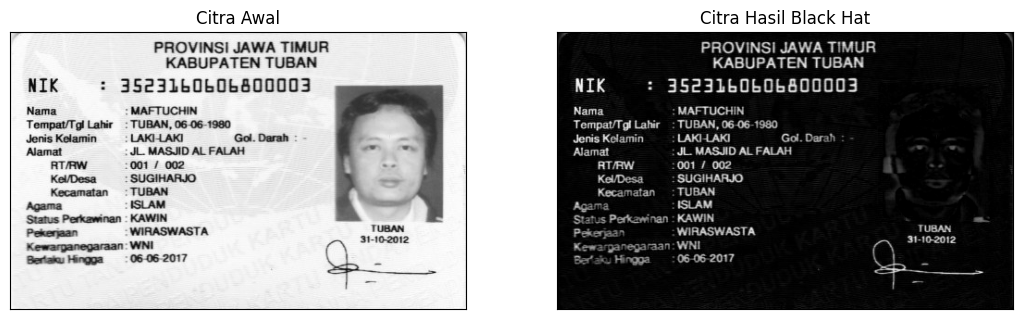

In [183]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

plt.figure(figsize=(20, 6))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

EROSI

In [184]:
def erosi_citra(F, k):
  height, width = F.shape

  structural_erosi = np.ones((k,k), dtype=np.uint8)
  constant = (k - 1) // 2

  image_copyS = np.zeros((height, width), dtype=np.uint8)
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structural_erosi
      image_copyS[i,j] = np.min(product)

  return image_copyS


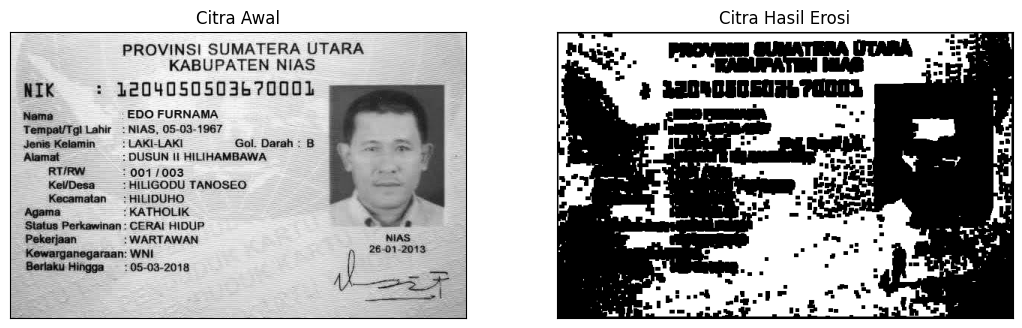

In [187]:
image1 = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp5.png', 0)

k = 5
ret, thresh = cv2.threshold(image1, 175, 225, cv2.THRESH_BINARY)
image_copyS = erosi_citra(thresh, k)


plt.figure(figsize=(20, 6))
plt.subplot(131), plt.imshow(image1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copyS, cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

OPENING

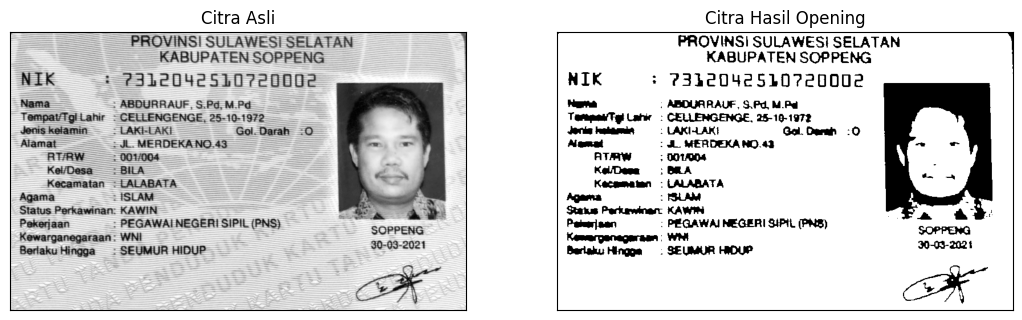

In [188]:
image_path = '/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/KTP7.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

ret, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
image_opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

TOP HAT

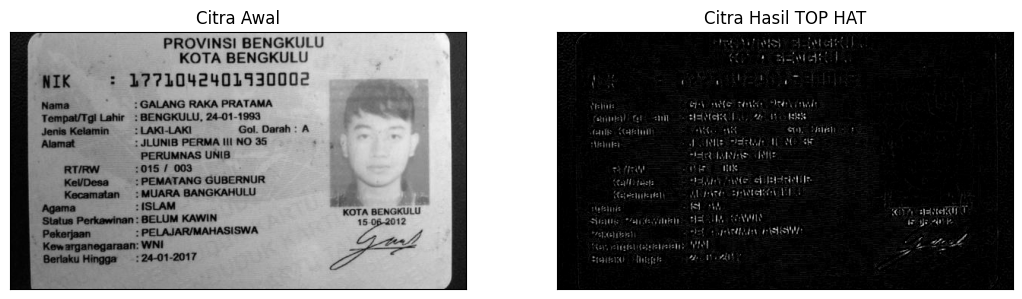

In [190]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()
